### **Name:** Francisco Tejeda Figueroa


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Dataset

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

#### EDA del dataset Iris

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


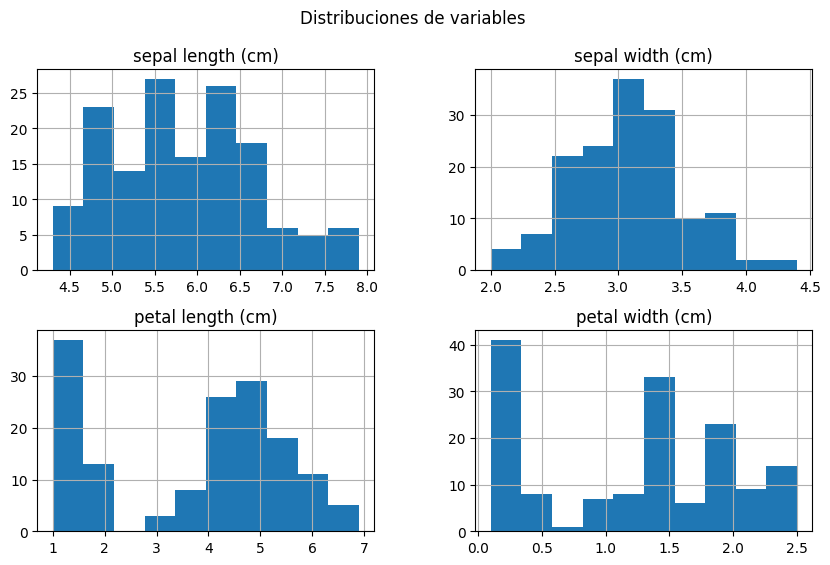

In [5]:
X.hist(figsize=(10, 6))
plt.suptitle('Distribuciones de variables')
plt.show()

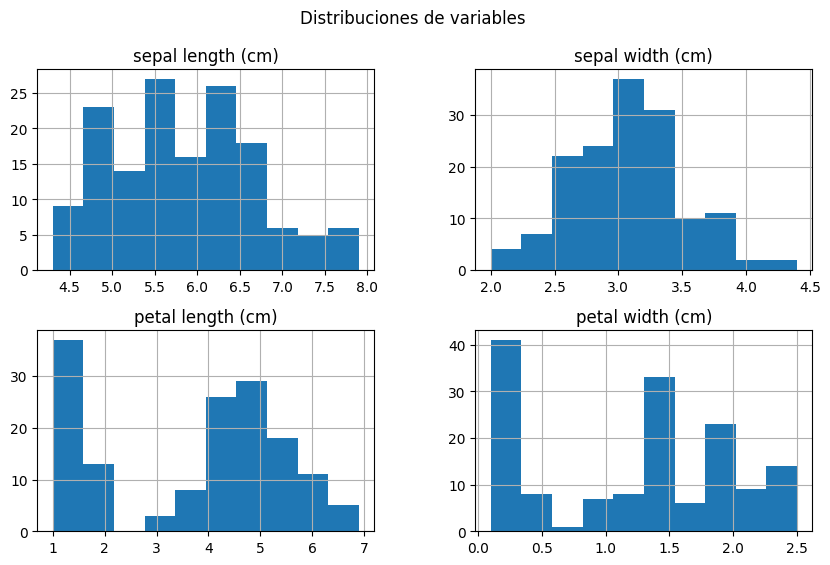

In [6]:
X.hist(figsize=(10, 6))
plt.suptitle('Distribuciones de variables')
plt.show()

#### Modelo base sin tuning

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Evaluación
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Visualización del árbol

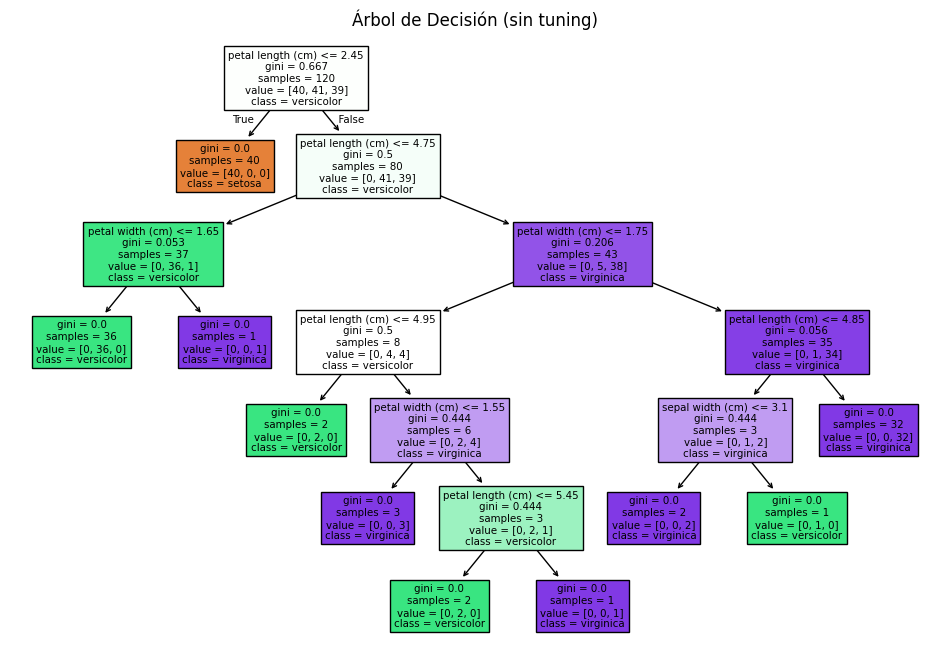

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión (sin tuning)")
plt.show()

#### Modelo con tuning (GridSearchCV)

In [11]:
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, None],
                         'min_samples_split': [2, 3, 4]})

In [12]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [13]:
print("Mejores hiperparámetros:", grid.best_params_)
print("Accuracy (tuned):", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Accuracy (tuned): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Importancia de variables

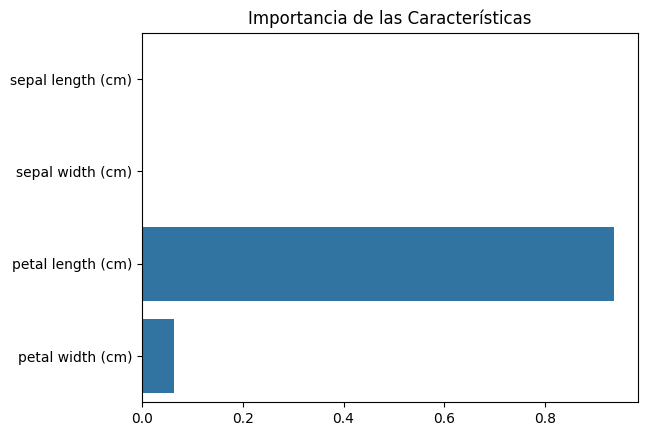

In [15]:
importances = best_model.feature_importances_
features = iris.feature_names

sns.barplot(x=importances, y=features)
plt.title("Importancia de las Características")
plt.show()
